In [1]:
import numpy as np
from qepy.io import QEInput
from qepy.driver import Driver
#from ase.io.trajectory import Trajectory
from ase.io.trajectory import Trajectory
from ase.build import bulk
from ase import Atoms
import matplotlib.pyplot as plt

In [2]:
from ase.units import kJ
from ase.eos import EquationOfState

In [3]:
atoms = bulk('Li', 'bcc', 3.51)

In [4]:
qe_options = {
    '&control': {
        'calculation': "'scf'",
        'prefix': "'oepp'",
        'pseudo_dir': "'/projectsn/mp1009_1/Valeria/NLPP/PP/'"},
    '&system': {
        'ibrav' : 0,
        'degauss': 0.02,
        # 'input_dft': "'pbe'",
        'ecutwfc': 80,
        'occupations': "'smearing'",
        'smearing': "'fermi-dirac'" 
    },
    '&electrons': {
        'conv_thr' : 1.0e-10,
        'mixing_beta': 0.3,},
     'atomic_species': ['Li 6.94 li_lda_v1.4.uspp.F.UPF'],
     'k_points automatic': ['4 4 4 0 0 0'],
}

In [5]:
alats = [0.8,0.85,0.9,0.95,0.975,1.0,1.025,1.05,1.075,1.1,1.15,1.2]
ks_ene = []
ks_rho = []
vol = []
atoms = bulk('Li', 'bcc', 3.51)
for x in alats:
    print(x)
    ta=atoms.copy()
    ta.cell *= x
    qe_options = QEInput.update_atoms(ta, qe_options = qe_options,  extrapolation=False)
    QEInput().write_qe_input('qe/'+str(x)+'.in', qe_options=qe_options)
    driver = Driver('qe/'+str(x)+'.in', logfile='qe/'+str(x)+'.out')
    driver.scf()
    ene = driver.get_energy()
    driver.stop()
    ks_ene.append(ene)
    vol.append(ta.get_volume())

ee=np.array(ks_ene)
vv=np.asarray(vol)
np.save('energy.npy', ee)
np.save('volume.npy', vv)

0.8
0.85
0.9
0.95
0.975
1.0
1.025
1.05
1.075
1.1
1.15
1.2


In [6]:
ee_eos= EquationOfState(vv/1, ee*27.211385/2, eos='murnaghan') 
vv0, ee0, B = ee_eos.fit()
eos = [ vv0, ee0, B / kJ * 1.0e24]

<AxesSubplot: title={'center': 'murnaghan: E: -194.493 eV, V: 19.797 Å$^3$, B: 12.703 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

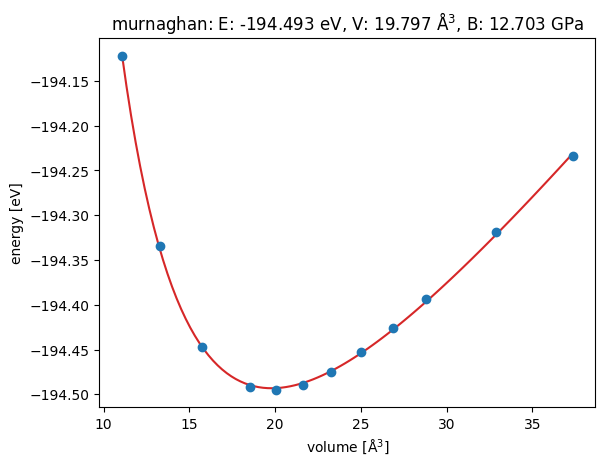

In [7]:
ee_eos.plot()

In [8]:
# Batteries/Li2S_interface/OF/Li/metal/PP/OEPP/LDA/tf02vw/lda_tf02vw.psp8

In [9]:
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional
from dftpy.formats import io
from dftpy.optimization import Optimization
from dftpy.mpi import sprint
from dftpy.functional.pseudo.psp import PSP
from dftpy.constants import environ
from ase.build import bulk
import numpy as np
from scipy.optimize import minimize
from scipy.signal import quadratic
from dftpy.api.api4ase import DFTpyCalculator
from dftpy.config import DefaultOption, OptionFormat

In [10]:
e_revhc = []
v_revhc = []
for alat in alats: 
    atoms = bulk('Li', 'bcc', 3.51)
    conf = DefaultOption()
    conf['PATH']['pppath'] = '/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/GBRV/LDA/tf02vw/'
    conf['PP']['Li'] = 'lda_tf02vw.psp8'
    conf['OPT']['method'] = 'CG'
    conf['KEDF']['kedf'] = 'revHC'
    conf['EXC']['xc'] = 'LDA'
    conf['JOB']['calctype'] = 'Energy Force'
    conf['OPT']['econv'] = 1.e-11
    conf['GRID']['ecut'] = 1600
    conf = OptionFormat(conf)
    calc = DFTpyCalculator(config=conf)
    atoms.set_calculator(calc)
    tta=atoms.copy()   
    tta.cell *= alat
    tta.set_calculator(calc)
    e_revhc.append(tta.get_potential_energy())
    v_revhc.append(tta.get_volume())

e_revhc=np.array(e_revhc)
v_revhc=np.asarray(v_revhc)
np.save('energy_revhc.npy', e_revhc)
np.save('volume_revhc.npy', v_revhc)

The final grid size is  [16 16 16]
setting key: Li -> /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/GBRV/LDA/tf02vw//lda_tf02vw.psp8


/tmp/ipykernel_63658/3985370866.py:16: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)
/tmp/ipykernel_63658/3985370866.py:19: DeprecationWarning: Please use atoms.calc = calc
  tta.set_calculator(calc)


Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.303875674531E+00     -2.303876E+00   3.041133E+00    1       1       1.320579E-01    
1       -4.813303293548E+00     -2.509428E+00   6.104360E+00    1       2       4.102306E-01    
2       -5.083540126965E+00     -2.702368E-01   7.686380E+00    1       2       6.831496E-01    
3       -5.159030702880E+00     -7.549058E-02   7.162951E+00    1       3       1.070882E+00    
4       -5.221370615782E+00     -6.233991E-02   7.124243E+00    1       3       1.519141E+00    
5       -5.298715101452E+00     -7.734449E-02   6.464755E+00    1       3       1.850985E+00    
6       -5.372294585804E+00     -7.357948E-02   6.167083E+00    1       3       2.180845E+00    
7       -5.441203283529E+00     -6.890870E-02   5.426662E+00    1       3       2.505865E+00    
8       -5.495517565730E+00     -5.431428E-02   2.939387E+00    1       3       2.859696E+00    
9       -5.523646171146E+00   

In [11]:
eos_revhc= EquationOfState(v_revhc/1, e_revhc, eos='murnaghan') 
v0_revhc, e0_revhc, B_revhc = eos_revhc.fit()
eos = [ vv0, ee0, B / kJ * 1.0e24]

/home/vr371/.local/lib/python3.8/site-packages/ase/eos.py:21: RuntimeWarning: invalid value encountered in power
  E = E0 + B0 * V / BP * (((V0 / V)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1)
/home/vr371/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/vr371/.local/lib/python3.8/site-packages/ase/eos.py:257: UserWarning: The minimum volume of your fit is not in your volumes.  You may not have a minimum in your dataset!
  warnings.warn(


<AxesSubplot: title={'center': 'murnaghan: E: nan eV, V: nan Å$^3$, B: nan GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

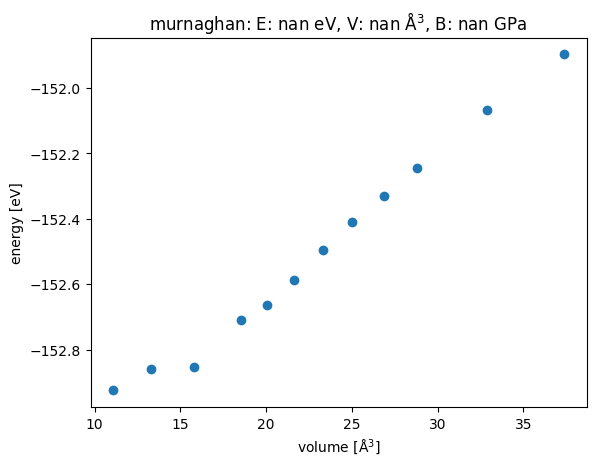

In [12]:
eos_revhc.plot()

In [13]:
e_tf02vw = []
v_tf02vw = []
for alat in alats: 
    print(alat)
    atoms = bulk('Li', 'bcc', 3.51)
    conf = DefaultOption()
    conf['PATH']['pppath'] = '/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/GBRV/LDA/tf02vw/'
    conf['PP']['Li'] = 'lda_tf02vw.psp8'
    conf['OPT']['method'] = 'CG'
    conf['KEDF']['kedf'] = 'TFvW'
    conf['KEDF']['y'] = 0.2
    conf['EXC']['xc'] = 'LDA'
    conf['JOB']['calctype'] = 'Energy Force'
    conf['OPT']['econv'] = 1.e-11
    conf['GRID']['ecut'] = 1600
    conf = OptionFormat(conf)
    calc = DFTpyCalculator(config=conf)
    atoms.set_calculator(calc)
    tta=atoms.copy()   
    tta.cell *= alat
    tta.set_calculator(calc)
    e_tf02vw.append(tta.get_potential_energy())
    v_tf02vw.append(tta.get_volume())

e_tf02vw=np.array(e_tf02vw)
v_tf02vw=np.asarray(v_tf02vw)
np.save('energy_tf02vw.npy', e_tf02vw)
np.save('volume_tf02vw.npy', v_tf02vw)

0.8
The final grid size is  [16 16 16]
setting key: Li -> /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/GBRV/LDA/tf02vw//lda_tf02vw.psp8


/tmp/ipykernel_63658/2462825658.py:18: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)
/tmp/ipykernel_63658/2462825658.py:21: DeprecationWarning: Please use atoms.calc = calc
  tta.set_calculator(calc)


Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.303875674531E+00     -2.303876E+00   3.041133E+00    1       1       8.022547E-03    
1       -6.833501060422E+00     -4.529625E+00   5.050538E-01    1       3       1.811218E-02    
2       -6.888145067658E+00     -5.464401E-02   3.284913E-01    1       2       2.462339E-02    
3       -6.922915924364E+00     -3.477086E-02   3.033088E-01    1       2       3.130031E-02    
4       -6.941334876469E+00     -1.841895E-02   2.369626E-01    1       3       4.035497E-02    
5       -6.950651118171E+00     -9.316242E-03   1.223651E-01    1       3       4.943633E-02    
6       -6.954383098962E+00     -3.731981E-03   5.171382E-02    1       2       5.585313E-02    
7       -6.956433273762E+00     -2.050175E-03   3.346345E-02    1       2       6.245804E-02    
8       -6.957629400929E+00     -1.196127E-03   1.875839E-02    1       2       6.879163E-02    
9       -6.958384227394E+00   

<AxesSubplot: title={'center': 'murnaghan: E: -190.518 eV, V: 25.963 Å$^3$, B: 10.681 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

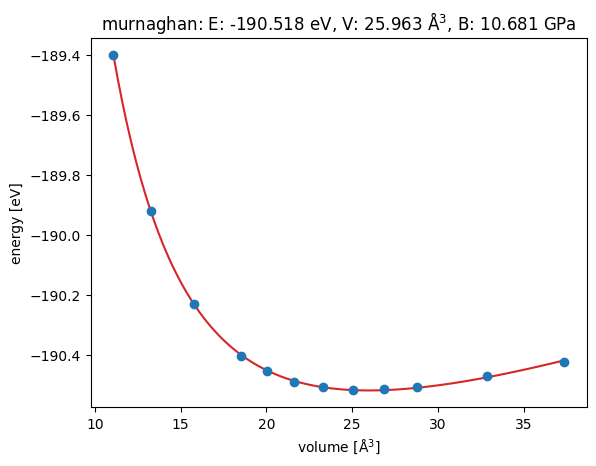

In [14]:
eos_tf02vw= EquationOfState(v_tf02vw/1, e_tf02vw, eos='murnaghan') 
v0_tf02vw, e0_tf02vw, B_tf02vw = eos_tf02vw.fit()
eos = [ vv0, ee0, B / kJ * 1.0e24]
eos_tf02vw.plot()

In [15]:
e_lmgp = []
v_lmgp = []
for alat in alats: 
    print(alat)
    atoms = bulk('Li', 'bcc', 3.51)
    conf = DefaultOption()
    conf['PATH']['pppath'] = '/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/GBRV/LDA/tf02vw/'
    conf['PP']['Li'] = 'lda_tf02vw.psp8'
    conf['OPT']['method'] = 'CG'
    conf['KEDF']['kedf'] = 'LMGP'
    # conf['KEDF']['y'] = 0.2
    conf['EXC']['xc'] = 'LDA'
    conf['JOB']['calctype'] = 'Energy Force'
    conf['OPT']['econv'] = 1.e-11
    conf['GRID']['ecut'] = 1600
    conf = OptionFormat(conf)
    calc = DFTpyCalculator(config=conf)
    atoms.set_calculator(calc)
    tta=atoms.copy()   
    tta.cell *= alat
    tta.set_calculator(calc)
    e_lmgp.append(tta.get_potential_energy())
    v_lmgp.append(tta.get_volume())

e_lmgp=np.array(e_lmgp)
v_lmgp=np.asarray(v_lmgp)
np.save('energy_lmgp.npy', e_lmgp)
np.save('volume_lmgp.npy', v_lmgp)

0.8
The final grid size is  [16 16 16]
setting key: Li -> /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/metal/PP/GBRV/LDA/tf02vw//lda_tf02vw.psp8


/tmp/ipykernel_63658/749187960.py:18: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)
/tmp/ipykernel_63658/749187960.py:21: DeprecationWarning: Please use atoms.calc = calc
  tta.set_calculator(calc)


Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.303875674531E+00     -2.303876E+00   3.041133E+00    1       1       5.305665E+00    
1       -6.120503877283E+00     -3.816628E+00   1.051953E+01    1       3       5.977181E+00    
2       -6.549590173899E+00     -4.290863E-01   8.551734E+00    1       2       6.432417E+00    
3       -6.677945919710E+00     -1.283557E-01   1.064015E+01    1       3       7.130535E+00    
4       -6.817652705403E+00     -1.397068E-01   1.317513E+01    1       3       7.825640E+00    
5       -6.963440566533E+00     -1.457879E-01   1.255070E+01    1       3       8.522840E+00    
6       -7.058617461923E+00     -9.517690E-02   9.649179E+00    1       3       9.218631E+00    
7       -7.130377659162E+00     -7.176020E-02   6.940598E+00    1       3       9.915952E+00    
8       -7.191212275847E+00     -6.083462E-02   7.976010E+00    1       2       1.038045E+01    
9       -7.240640843873E+00   

<AxesSubplot: title={'center': 'murnaghan: E: -200.627 eV, V: 1.737 Å$^3$, B: -94.557 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

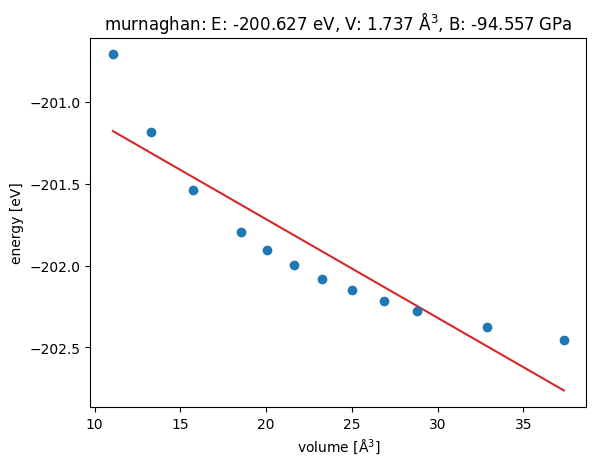

In [16]:
eos_lmgp= EquationOfState(v_lmgp/1, e_lmgp, eos='murnaghan') 
v0_lmgp, e0_lmgp, B_lmgp = eos_lmgp.fit()
eos = [ vv0, ee0, B / kJ * 1.0e24]
eos_lmgp.plot()

In [17]:
import pandas as pd

In [20]:
kedfs = ['KS', 'revHC', 'TF02vW', 'LMGP']
e0 = [ee0, e0_revhc, e0_tf02vw, e0_lmgp]
v0 = [vv0, v0_revhc, v0_tf02vw, v0_lmgp]
B0 = [B, B_revhc, B_tf02vw, B_lmgp]
eos = {}
for i,ke in enumerate(kedfs):
    eos[ke] = [v0[i], e0[i], B0[i]/ kJ * 1.0e24]

In [23]:
df = pd.DataFrame.from_dict(eos, orient='index', columns=[ 'Volume ($A^3$)', 'Energy (eV)', 'Bulk modulos (GPa)'])
df.reset_index(inplace=False)
df.rename(columns={'index': 'Element'}, inplace=True)
df.style\
    .format(precision=3, decimal=".")

,Volume ($A^3$),Energy (eV),Bulk modulos (GPa)
KS,19.797,-194.493,12.703
revHC,nan,nan,nan
TF02vW,25.963,-190.518,10.681
LMGP,1.737,-200.627,-94.557


Text(0.5, 0, 'Volume ($A^{3}$)')

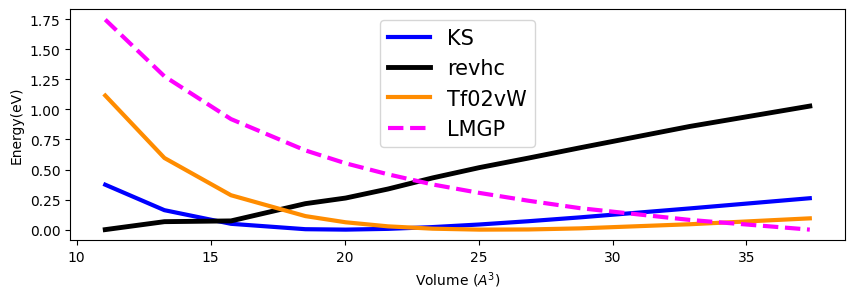

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(10, 3))

plt.plot(vv, ee*27.211385/2-min(ee*27.211385/2), ls='-', lw=3,color='b',label='KS')
plt.plot(v_revhc, e_revhc-min(e_revhc), color='k', lw=3.5, label='revhc')
plt.plot(v_tf02vw, e_tf02vw-min(e_tf02vw), color='darkorange', lw=3.0, label='Tf02vW')
plt.plot(v_lmgp, e_lmgp-min(e_lmgp), ls='--', lw=3.0,color='magenta',label='LMGP')
plt.legend(fontsize=15)
plt.ylabel('Energy(eV)')
plt.xlabel('Volume ($A^{3}$)')
